**Dataset Analysis**

Reading data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# !unzip '/content/gdrive/My Drive/Movies/posters.zip'
!unzip '/content/gdrive/My Drive/Movies/archive.zip'

import numpy as np 
import pandas as pd 
from scipy import misc
import matplotlib.pyplot as plt
movies = pd.read_csv("MovieGenre.csv",encoding="ISO-8859-1")
print(movies.columns)
print("Total Number of Movies is: " + str(len(movies.index)))
genrelist = []
length = len(movies)
for n in range(0,length):
    genres = str(movies.loc[n]["Genre"])
    genres = genres.split("|")
    genrelist.extend(genres) 
unique_genres = list(set(genrelist))
print("Total Number of Genres is: " + str(len(unique_genres)))

Mounted at /content/gdrive
Archive:  /content/gdrive/My Drive/Movies/archive.zip
  inflating: MovieGenre.csv          
  inflating: SampleMoviePosters/SampleMoviePosters/10040.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10057.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10071.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10155.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10195.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10208.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10247.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10267.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10281.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10307.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10323.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10418.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10726.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10747.jpg  

**Full Dataset**

**Number of Movies per Genre** in complete dataset

Film-Noir 403
Horror 3990
War 1173
nan 145
Sci-Fi 2020
Action 5331
Romance 6224
Comedy 12682
Short 1066
News 83
Thriller 4816
Reality-TV 2
Talk-Show 7
Documentary 3882
Music 1292
Crime 5270
Western 853
Mystery 2395
Adventure 3829
Family 2100
Fantasy 2012
Game-Show 1
Sport 707
Adult 14
Musical 845
Drama 20053
Animation 1750
History 1426
Biography 1999


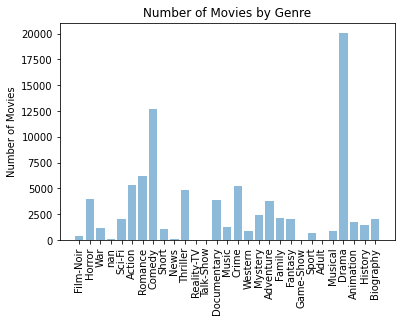

In [ ]:
countlist = []
k=0
for genre in unique_genres:
    ct = genrelist.count(genre)
    countlist.append(ct)
    print(genre + " " + str(ct))
y_pos = np.arange(len(unique_genres))
plt.bar(y_pos,countlist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Genre")
plt.show()

**Average Rating per Genre** in complete dataset

Film-Noir 6.96
Horror 5.35
War 6.91
nan nan
Sci-Fi 5.52
Action 5.98
Romance 6.52
Comedy 6.28
Short 6.99
News 7.29
Thriller 5.92
Reality-TV 5.70
Talk-Show 7.93
Documentary 7.28
Music 6.76
Crime 6.46
Western 6.36
Mystery 6.30
Adventure 6.29
Family 6.32
Fantasy 6.16
Game-Show 5.50
Sport 6.59
Adult 4.75
Musical 6.61
Drama 6.65
Animation 6.83
History 7.09
Biography 7.06


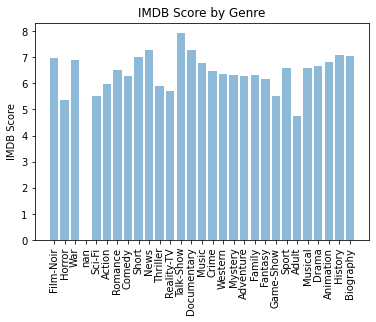

In [ ]:
avglist = []
for genre in unique_genres:
    movies_of_genre = movies[movies["Genre"].str.contains(genre,na=False)]
    avg = movies_of_genre["IMDB Score"].mean()
    avglist.append(avg)
    print(genre + " {0:.2f}".format(avg))
plt.bar(y_pos,avglist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("IMDB Score")
plt.title("IMDB Score by Genre")
plt.show()

In [ ]:
path = './SampleMoviePosters/SampleMoviePosters'
from glob import glob
all_posters = sorted(glob(path + '/*'))
all_posters = pd.DataFrame({'path' : all_posters})
all_posters['filetype'] = all_posters.apply(lambda row: row.path.split(".")[-1],axis=1)
all_posters['ID'] = all_posters.apply(lambda row: row.path.split("/")[-1],axis=1)
all_posters['ID'] = (all_posters['ID'].apply(lambda row: row.split(".")[0])).apply(np.int64)

**Reduced Dataset** 

In [ ]:
poster_ID = all_posters["ID"].values.tolist()
movies["imdbId"] = movies["imdbId"].astype(np.int64)
movies = movies[movies['imdbId'].isin(all_posters["ID"])]
#Count unique genres again
genrelist = []
for n in range(0,length):
    try:
        genres = str(movies.loc[n]["Genre"])
        genres = genres.split("|")
        genrelist.extend(genres)
    except:
        q=1
        
unique_genres = list(set(genrelist))
num_genres = len(unique_genres)
print("Total Number of Movies is : {}".format(len(movies)))
print("Total Number of Unique Genres is : {}".format(num_genres))

Total Number of Movies is : 1018
Total Number of Unique Genres is : 23


**Number of movies per genre** in reduced dataset

Film-Noir 13
Horror 61
War 38
Sci-Fi 11
Action 44
Romance 317
Comedy 372
Short 112
Thriller 33
Documentary 18
Music 9
Crime 115
Western 42
Mystery 61
Adventure 81
Family 44
Fantasy 45
Sport 14
Musical 58
Drama 601
Animation 28
History 41
Biography 21


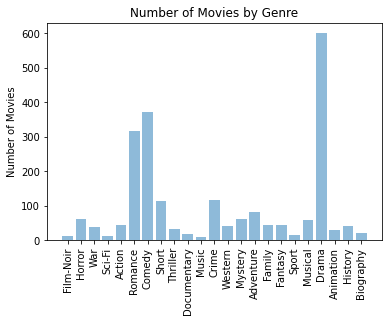

In [ ]:
countlist = []
k=0
for genre in unique_genres:
    ct = genrelist.count(genre)
    countlist.append(ct)
    print(genre + " " + str(ct))

y_pos = np.arange(len(unique_genres))
plt.bar(y_pos,countlist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Genre")
plt.show()

**Average Rating per genre** in reduced dataset

Film-Noir 6.79
Horror 6.92
War 7.12
Sci-Fi 7.31
Action 6.84
Romance 7.04
Comedy 7.01
Short 6.87
Thriller 6.90
Documentary 7.44
Music 7.09
Crime 6.89
Western 6.44
Mystery 6.69
Adventure 7.00
Family 7.23
Fantasy 7.07
Sport 7.03
Musical 7.13
Drama 7.00
Animation 7.10
History 7.01
Biography 6.92


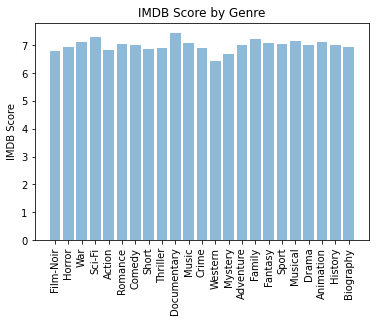

In [ ]:
avglist = []
for genre in unique_genres:
    movies_of_genre = movies[movies["Genre"].str.contains(genre,na=False)]
    avg = movies_of_genre["IMDB Score"].mean()
    avglist.append(avg)
    print(genre + " {0:.2f}".format(avg))

plt.bar(y_pos,avglist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("IMDB Score")
plt.title("IMDB Score by Genre")
plt.show()

**Displaying a few data points**

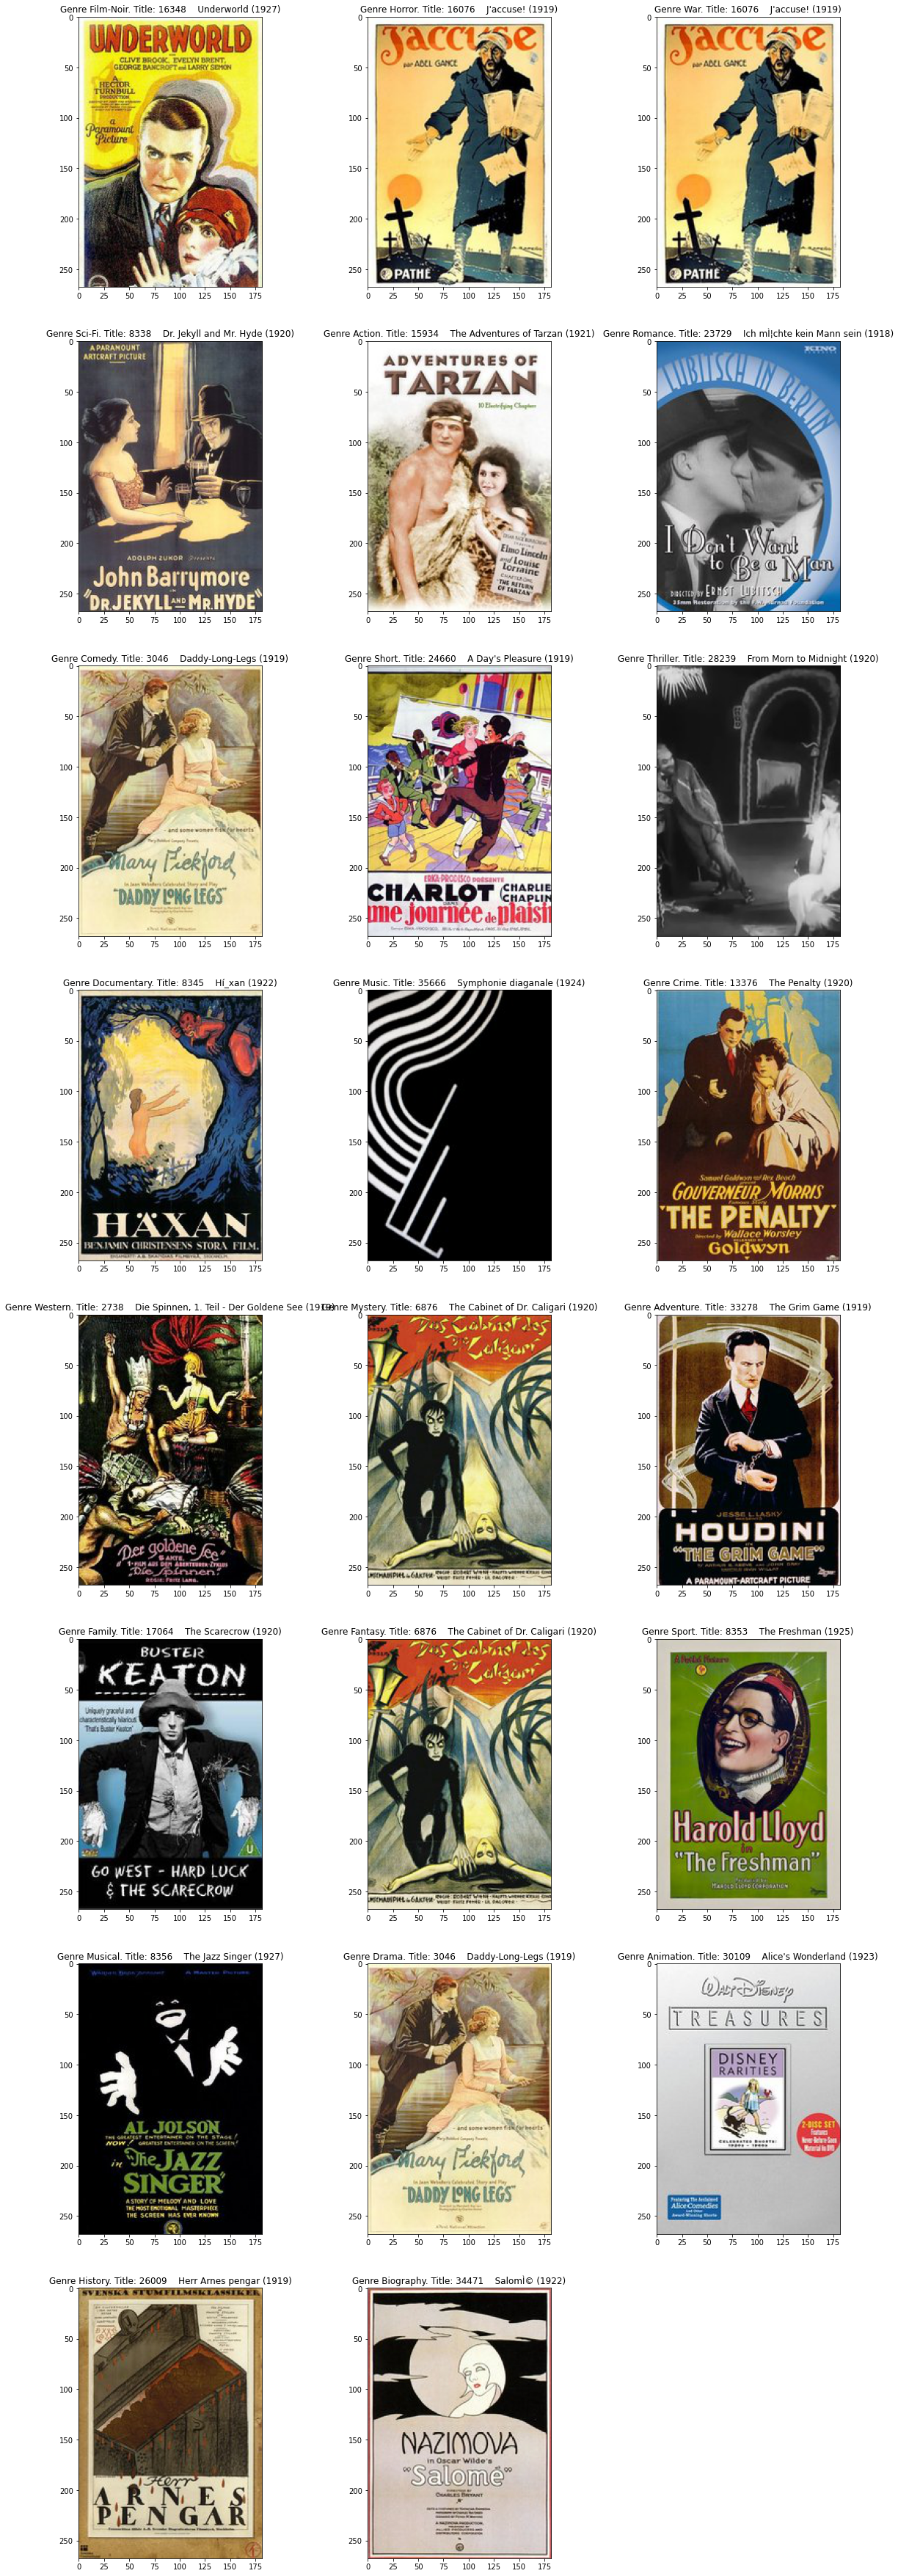

In [ ]:
fig = plt.figure(figsize=(20,80))
i=1
for genre in unique_genres:
    ax = fig.add_subplot(10,3,i)
    i+=1
    movies_of_genre = movies[movies["Genre"].str.contains(genre,na=False)]
    poster_ID = movies_of_genre["imdbId"].values.tolist()
    all_posters_subset = all_posters[all_posters["ID"].isin(poster_ID)]
    sample = all_posters_subset.values[0]
    plt.imshow(plt.imread(sample[0]))
    ID = sample[2]
    title_of_movie = movies_of_genre[movies_of_genre["imdbId"] == ID]["Title"]
    plt.title('Genre {}. Title: {}'.format(genre,title_of_movie.to_string()))

**Average Colour Intensity per genre** in reduced dataset

In [ ]:
from collections import defaultdict
import imageio
indices = []
images = []
for _, row in movies.iterrows():
    try:
        path = all_posters[all_posters["ID"] == row["imdbId"]]['path'].values[0]
        img = imageio.imread(path)
        images.append(img)
        indices.append(row["imdbId"])
    except:
        print('image read failed for {}'.format(path))

print("Images read in : {}".format(len(images)))
movie_im = pd.DataFrame(
        {
            'ID': indices,
            'images': images
        }
    )

Images read in : 1018


In [ ]:
dfs = []
dfs = pd.DataFrame(
        {
            'rows': list(map(lambda i: i.shape[0], images)),
            'columns': list(map(lambda i: i.shape[1], images)),
            'channels': list(map(lambda i: i.shape[2], images))
        }
    )

df_grouped = dfs.groupby(by=['channels', 'columns', 'rows']).size().reset_index().sort_values(['channels', 0], ascending=False)

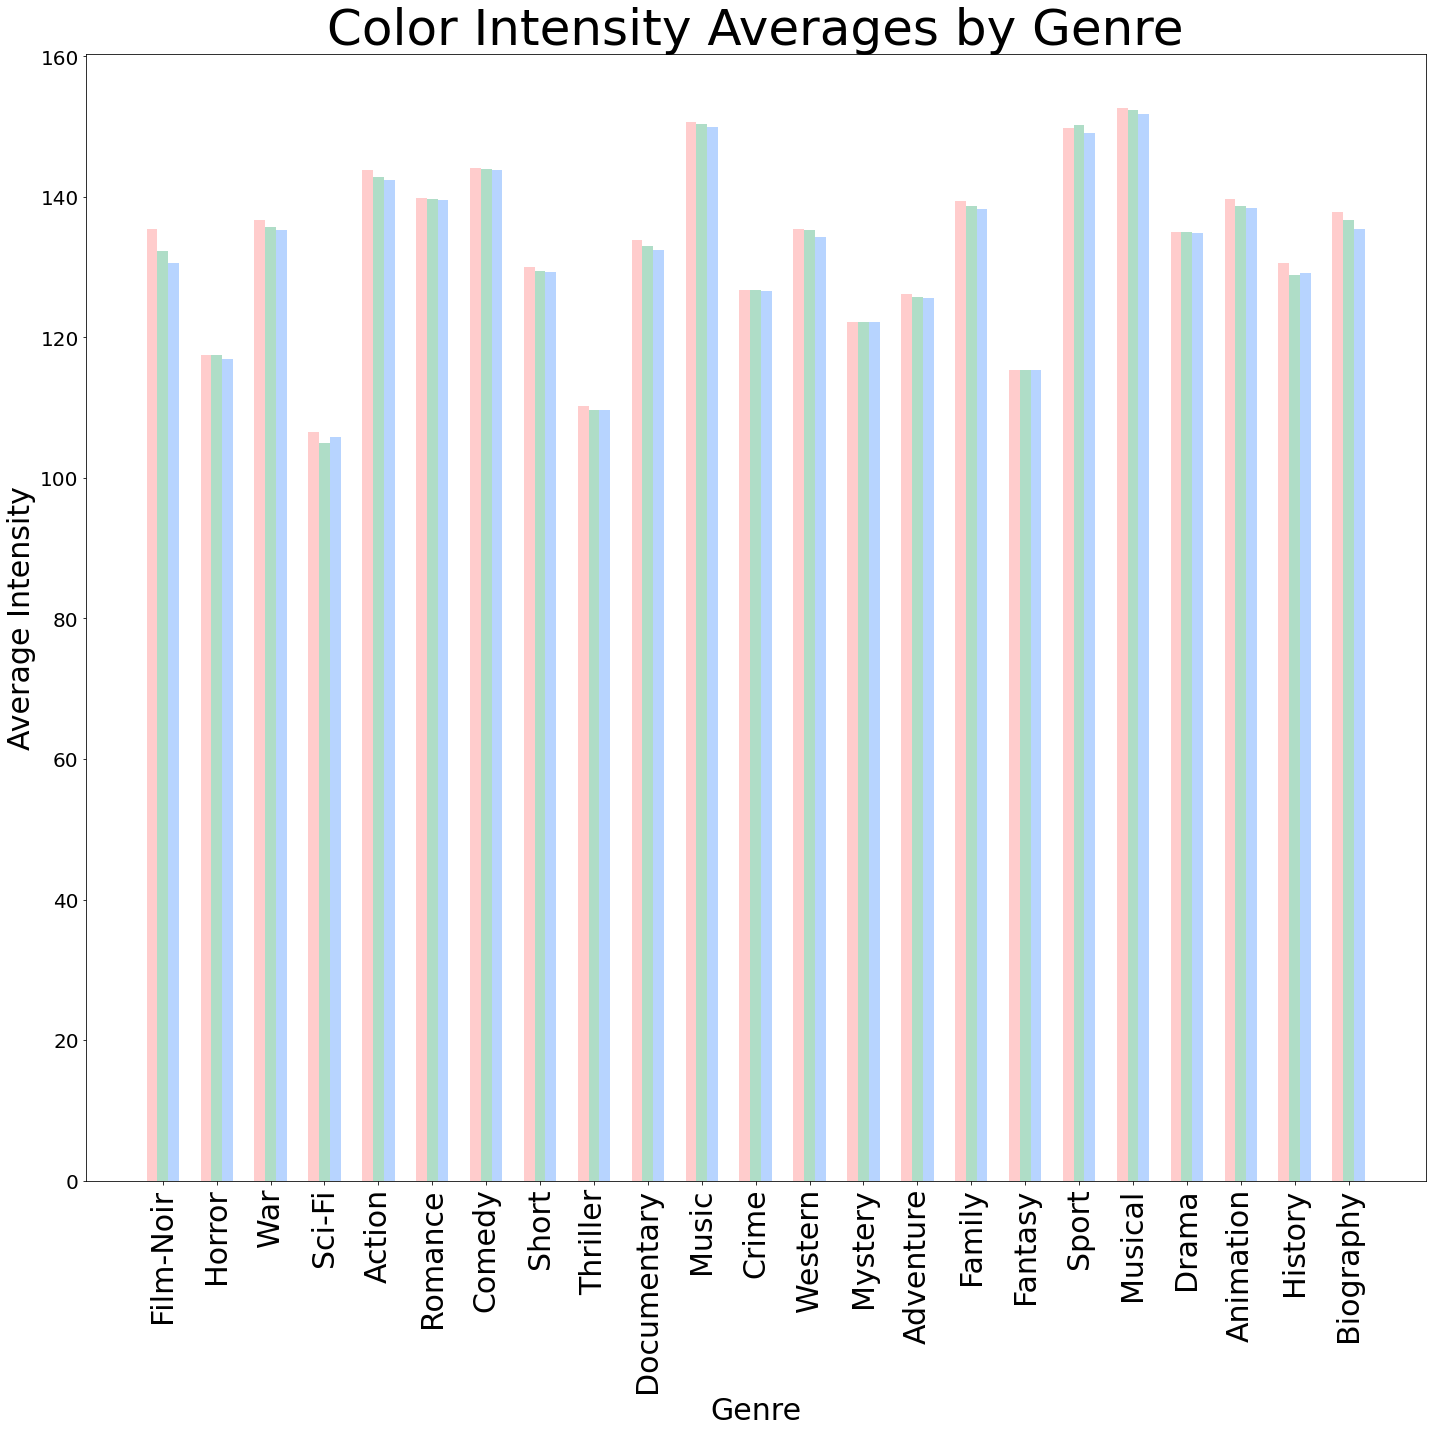

In [ ]:
#Next we will plot the average R,G,B, values for each genre
red_avg = []
blue_avg = []
green_avg = []

for genre in unique_genres:
    red = np.array([],dtype=np.uint8,ndmin=1)
    green = np.array([],dtype=np.uint8,ndmin=1)
    blue = np.array([],dtype=np.uint8,ndmin=1)
    movies_of_genre = movies[movies["Genre"].str.contains(genre,na=False)]
    poster_ID = movies_of_genre["imdbId"].values.tolist()

    movie_im_subset = movie_im[movie_im["ID"].isin(poster_ID)]
    for _, row in movie_im_subset.iterrows():
        im = row['images']
        red = np.append(red,np.ravel(im[:,:,0]))
        green = np.append(red,np.ravel(im[:,:,1]))
        blue = np.append(red,np.ravel(im[:,:,2]))
    
    
    red_avg.append(np.average(red))
    green_avg.append(np.average(green))
    blue_avg.append(np.average(blue))

fig, ax = plt.subplots(figsize=(20,20))
index = np.arange(len(unique_genres))
bar_width = 0.2
opacity = 0.4
 
rects1 = plt.bar(index, red_avg, bar_width,
                 alpha=opacity,
                 color='#ff8080',
                 label='Red')
 
rects2 = plt.bar(index + bar_width, green_avg, bar_width,
                 alpha=opacity,
                 color='#39ac73',
                 label='Green')

rects3 = plt.bar(index + 2*bar_width, blue_avg, bar_width,
                 alpha=opacity,
                 color='#4d94ff',
                 label='Blue')
 
plt.xlabel('Genre',fontsize=30)
plt.ylabel('Average Intensity',fontsize=30)
plt.title('Color Intensity Averages by Genre',fontsize=50)
plt.xticks(index + bar_width, (unique_genres),rotation='vertical',fontsize=30)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()